<a href="https://colab.research.google.com/github/JoshuaBarsky/Math-152/blob/main/Classwork_3_9_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np
from PIL import Image

Order. Chaos.

Determinism.  Unpredictability.

Individuals.  Collective.

..Iteration.

**Complex Number**

$\mathbb{C}$ = $\mathbb{R}$ + $\mathbb{R}j$

In [46]:
z = 1+2j
z*z

(-3+4j)

In [47]:
def stay_bounded(c):
  for i in range(1000):
    c = (c**2)+c
    if c > 10:
      return False
    else:
      continue
  return True

In [48]:
print(stay_bounded(.01))

False


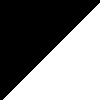

In [56]:
x = np.arange(-50,50)
y = np.arange(-50,50)
xy = np.add.outer(x,y)

bool_arr = (xy >= 2)

image = Image.fromarray(bool_arr)
image.show() 